In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
PATH = "regression.csv"
DATASET_SIZE = 10000

dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

In [3]:
for column in dataset.columns:
    dataset[column] = dataset[column].str.split().str.join("")
    dataset[column] = pd.to_numeric(dataset[column])

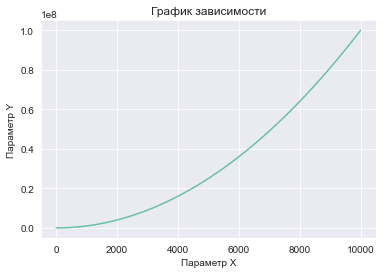

In [4]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(
    x=dataset["x"],
    y=dataset["y"],
)

plt.title('График зависимости')
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [5]:
x = np.array(dataset["x"]).reshape(-1, 1)
y = np.array(dataset["y"]).reshape(-1, 1)

In [6]:
DEGREES = 2

regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 4.323661516743e-15


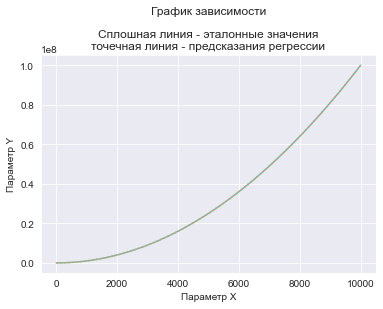

In [10]:
sns.lineplot(
    x=dataset["x"],
    y=dataset["y"],
    linestyle="solid"
)

sns.lineplot(
    x=dataset["x"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)

plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [8]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)

x_parameters

array([31.99999989, 12.        ,  1.        ])